In [ ]:
# Bài 2.2. Cho dữ liệu có chứa thông tin về giới tính, chiều cao và cân nặng của 200 người
# được lưu trong tệp gender_height_weight.csv
# a) Viết chương trình sử dụng thuật toán K-mean để phân cụm dữ liệu trên thành k
# cụm (k = 2, 3, 4, 5)
# b) Trực quan hóa các cụm dữ liệu ứng với các k ở câu 2.1.a)

In [8]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [2]:
# a) Viết chương trình sử dụng thuật toán K-mean để phân cụm dữ liệu trên thành k
# cụm (k = 2, 3, 4, 5)
df=pd.read_csv('Gender_Height_Weight.csv')
df.tail(5)

,Gender,Height,Weight
195,Male,145,108
196,Male,157,74
197,Female,177,117
198,Female,166,144
199,Male,193,151


In [6]:
# Trực quan hóa dữ liệu
label_encoder=LabelEncoder()
df['Gender']=label_encoder.fit_transform(df['Gender'])
df.tail(5)

,Gender,Height,Weight
195,1,145,108
196,1,157,74
197,0,177,117
198,0,166,144
199,1,193,151


In [7]:
X=df.values
# Áp dụng K-means cho các giá trị k = 2, 3, 4, 5
for k in [2, 3, 4, 5]:
    # Khởi tạo và huấn luyện mô hình K-means
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    
    # Hiển thị kết quả
    print(f"\nK = {k}:")
    print(f"Tâm cụm (cluster centers):\n{kmeans.cluster_centers_}")
    print(f"Nhãn cụm (cluster labels):\n{labels}")


K = 2:
Tâm cụm (cluster centers):
[[  0.52173913 170.33913043  84.9826087 ]
 [  0.47058824 174.01176471 137.57647059]]
Nhãn cụm (cluster labels):
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1
 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0
 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0
 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1
 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0
 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1]

K = 3:
Tâm cụm (cluster centers):
[[  0.54878049 174.30487805 106.96341463]
 [  0.4        171.86666667 145.26666667]
 [  0.53448276 168.53448276  68.62068966]]
Nhãn cụm (cluster labels):
[0 0 0 0 2 0 0 0 0 0 2 2 0 2 2 0 0 1 1 1 0 1 0 1 2 2 0 2 1 1 0 2 2 1 1 1 0
 2 1 2 0 0 2 0 0 2 0 0 2 1 1 2 0 0 0 0 0 1 2 2 2 1 2 2 1 1 0 2 2 1 2 0 2 2
 0 1 0 0 0 2 2 1 0 0 0 2 1 0 0 1 1 0 0 2 0 1 2 1 2 2 1 0 1 1 1 0 1 1 0 2 2
 1 1 0 0 2 2 0 0 1 2 0 1 1 1 0 0

In [ ]:
# Hàm phân cụm và trực quan hóa
def cluster_and_visualize(X, k_values):
    for k in k_values:
        # Áp dụng K-means
        kmeans = KMeans(n_clusters=k, random_state=42)
        y_kmeans = kmeans.fit_predict(X)

        # Sử dụng PCA để giảm số chiều xuống 2D
        pca = PCA(n_components=2)
        X_reduced = pca.fit_transform(X)

        # Trực quan hóa dữ liệu
        plt.figure(figsize=(8, 6))
        for i in range(k):
            plt.scatter(X_reduced[y_kmeans == i, 0], X_reduced[y_kmeans == i, 1], label=f'Cụm {i+1}')
        
        # Hiển thị tâm cụm (sau PCA)
        centers_reduced = pca.transform(kmeans.cluster_centers_)
        plt.scatter(centers_reduced[:, 0], centers_reduced[:, 1], 
                    s=200, c='red', marker='X', label='Tâm cụm')
        
        plt.title(f'Phân cụm K-means với k = {k}')
        plt.xlabel('Thành phần chính 1')
        plt.ylabel('Thành phần chính 2')
        plt.legend()
        plt.grid(True)
        plt.show()

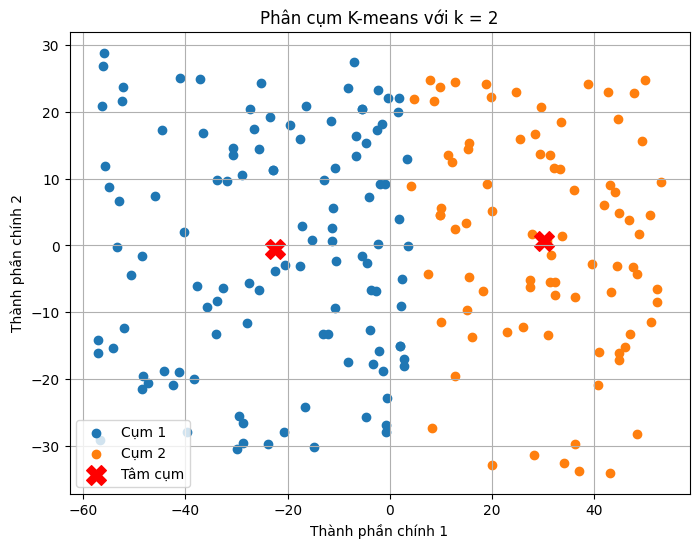

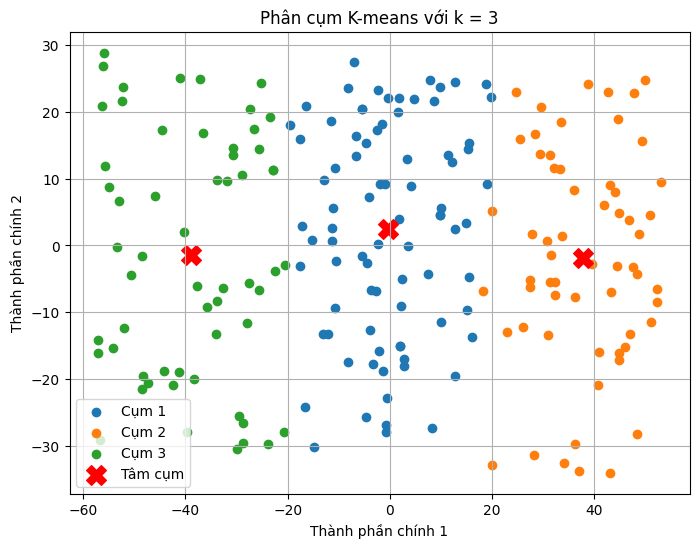

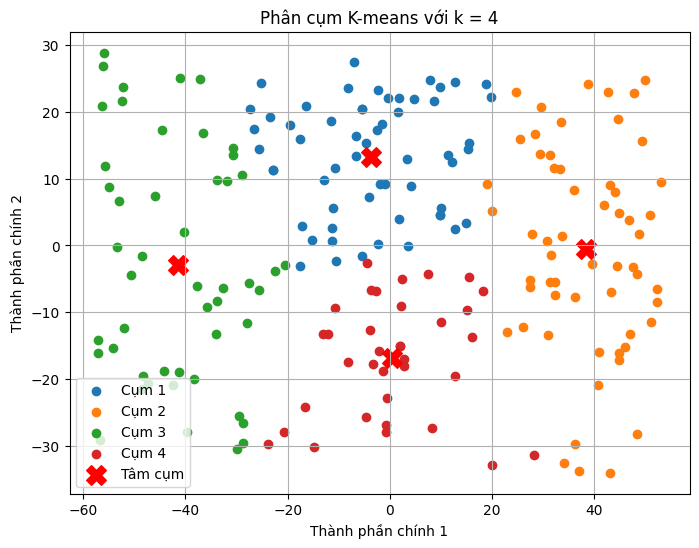

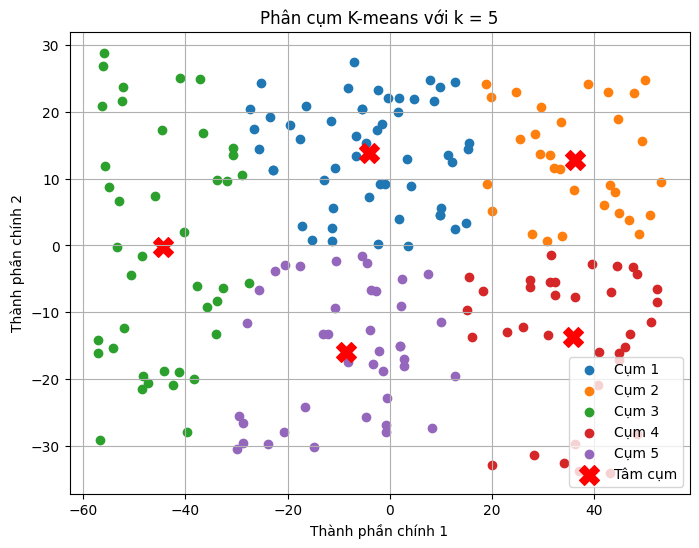

In [17]:
# Gọi hàm với k = 2, 3, 4, 5
cluster_and_visualize(X, k_values=[2, 3, 4, 5])